# Feature Selection Using Information Gain
In this notebook we will discuss how to select features using information gain for classification in machine learning.

Informatin gain is also called as mutual information in classification problem statements.
## Mutual Information
MI esitmate mutual information for a discrete target feature.

Mutual Information between two random features is a non-negative value, which measures the dependency between the features. It is equal to zero if and only if two random features are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbours distances.

In short

A quantity called mutual information measures the amount of information one can obtain from one random feature given another. 

The mutual information between two random features X and Y can be stated formally as follows:

**I(X; Y) = H(X) - H(X|Y) Where I(X; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X|Y) is the conditional entropy for X given Y. The result has the units of bits.**

In [3]:
!pip install opendatasets --upgrade --quiet
import opendatasets as od

od.download('https://www.kaggle.com/dell4010/wine-dataset?select=wine_dataset.csv')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: venupodugu
Your Kaggle Key: ········


100%|█████████████████████████████████████████████████████████████████████████████| 97.6k/97.6k [00:00<00:00, 2.38MB/s]

In [4]:
# Importing the dataset

df = pd.read_csv('./wine-dataset/wine_dataset.csv')

<IPython.core.display.Javascript object>

In [5]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [6]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'style'],
      dtype='object')

In [9]:
df['style'].unique()

array(['red', 'white'], dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  style                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [12]:
# Splitting the dataset into Training  and Test sets

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(df.drop(labels=['style'], axis=1), 
                                                            df['style'], 
                                                            test_size=0.3, 
                                                            random_state=0)
X_train.shape, X_test.shape

((4547, 12), (1950, 12))

## Feature selection

In [13]:
from sklearn.feature_selection import mutual_info_classif

# Determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.13820689, 0.23326317, 0.09922063, 0.20540064, 0.34875144,
       0.15272286, 0.33713995, 0.15251168, 0.05868114, 0.15270819,
       0.03170741, 0.01317569])

In [15]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

<IPython.core.display.Javascript object>

chlorides               0.348751
total_sulfur_dioxide    0.337140
volatile_acidity        0.233263
residual_sugar          0.205401
free_sulfur_dioxide     0.152723
sulphates               0.152708
density                 0.152512
fixed_acidity           0.138207
citric_acid             0.099221
pH                      0.058681
alcohol                 0.031707
quality                 0.013176
dtype: float64

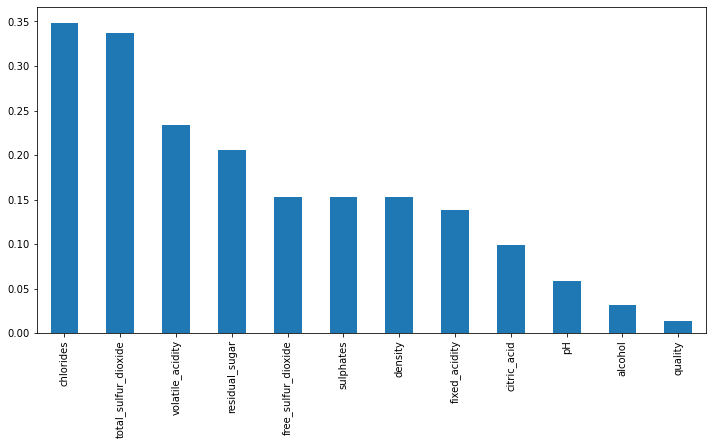

In [18]:
# Let's plot the ordered mutual_info values per feature

mutual_info.sort_values(ascending=False).plot.bar(figsize = (12,6))

## Selecting the features that are giving highest MI:

In [19]:
from sklearn.feature_selection import SelectKBest

# We will select the top 8 important features
sel_8_cols = SelectKBest(mutual_info_classif, k=8)
sel_8_cols.fit(X_train.fillna(0), y_train)
X_train.columns[sel_8_cols.get_support()]

Index(['fixed_acidity', 'volatile_acidity', 'residual_sugar', 'chlorides',
       'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'sulphates'],
      dtype='object')

## Difference between Information Gain and Mutual Information
I(X; Y) = H(X) - H(X|Y)  and IG(S, a) = H(S) - H(S|a)

As such, MI is sometimes used as a synonym for information gain. Technically, they calculate the same quantity if applied to the same data.